# Thyroid Analysis

In [1]:
!pip install pynrrd

In [43]:
import cv2
import numpy as np
import nrrd
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import os

## 1. NRRD Files

In [44]:
# Set the directory you want to list files from
directory = 'dataUSGthyroid/SAMSUNG'

# Use the glob module to create a list of file paths
images_paths = sorted(glob.glob(directory + '/images' + '**/*', recursive=True))
contoures_paths = sorted(glob.glob(directory + '/masks' + '**/*', recursive=True))

In [9]:
images_paths[:10]

['dataUSGthyroid/SAMSUNG/images/109800_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1104018_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1109437_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/11276_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1127758_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1129218_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1155158_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1186918_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/1212278_image.nrrd',
 'dataUSGthyroid/SAMSUNG/images/121857_image.nrrd']

In [10]:
contoures_paths[:10]

['dataUSGthyroid/SAMSUNG/masks/109800_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1104018_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1109437_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/11276_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1127758_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1129218_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1155158_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1186918_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/1212278_label.nrrd',
 'dataUSGthyroid/SAMSUNG/masks/121857_label.nrrd']

In [11]:
# Read the NRRD file
nrrd_data, header = nrrd.read(images_paths[220])

# Print the NRRD header
print(header)

# Access the data from the NRRD file
print(nrrd_data)

OrderedDict([('type', 'uint8'), ('dimension', 2), ('sizes', array([ 872, 1280])), ('encoding', 'gzip')])
[[62 62 62 ... 62 62 62]
 [61 61 61 ... 61 61 61]
 [61 61 61 ... 61 61 61]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


In [12]:
nrrd_data.shape

(872, 1280)

In [13]:
header

OrderedDict([('type', 'uint8'),
             ('dimension', 2),
             ('sizes', array([ 872, 1280])),
             ('encoding', 'gzip')])

In [14]:
len(contoures_paths)

820

dataUSGthyroid/SAMSUNG/images/2086374_image.nrrd
dataUSGthyroid/SAMSUNG/masks/2086374_label.nrrd


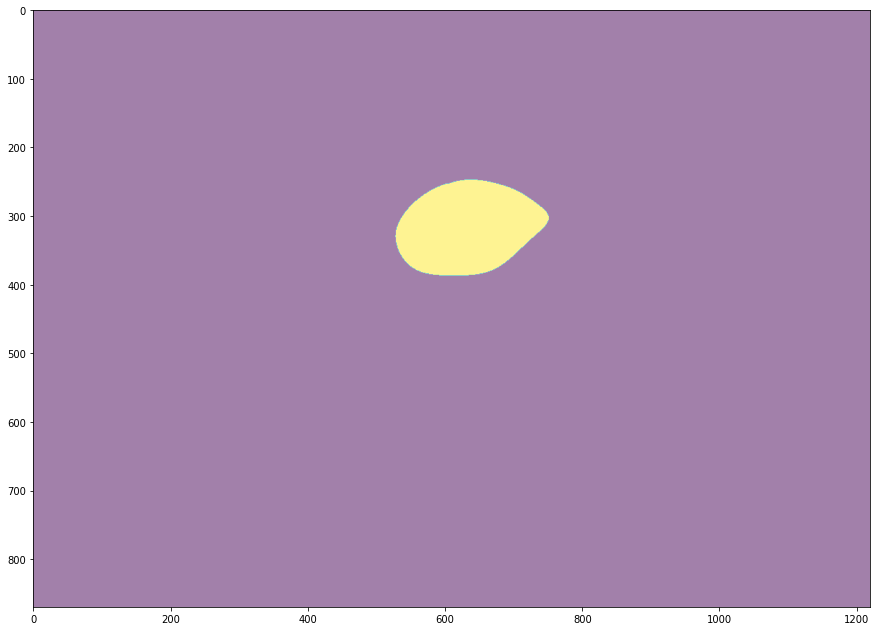

In [27]:
X_MARGIN = 1
Y_MARGIN = 30

i = 310

print(images_paths[i])
print(contoures_paths[i])

# Read images
image1, header = nrrd.read(images_paths[i])
image2, header = nrrd.read(contoures_paths[i])

image1 = image1[X_MARGIN:-X_MARGIN, Y_MARGIN:-Y_MARGIN]
image2 = image2[X_MARGIN:-X_MARGIN, Y_MARGIN:-Y_MARGIN]

fig = plt.figure(figsize=(15, 15))

# Create a single subplot
ax = plt.subplot()

# ax.imshow(image1)
ax.imshow(image2, alpha=0.5)

# Show the figure
plt.show()

In [10]:
image1.shape

(358, 500)

### Detect lines

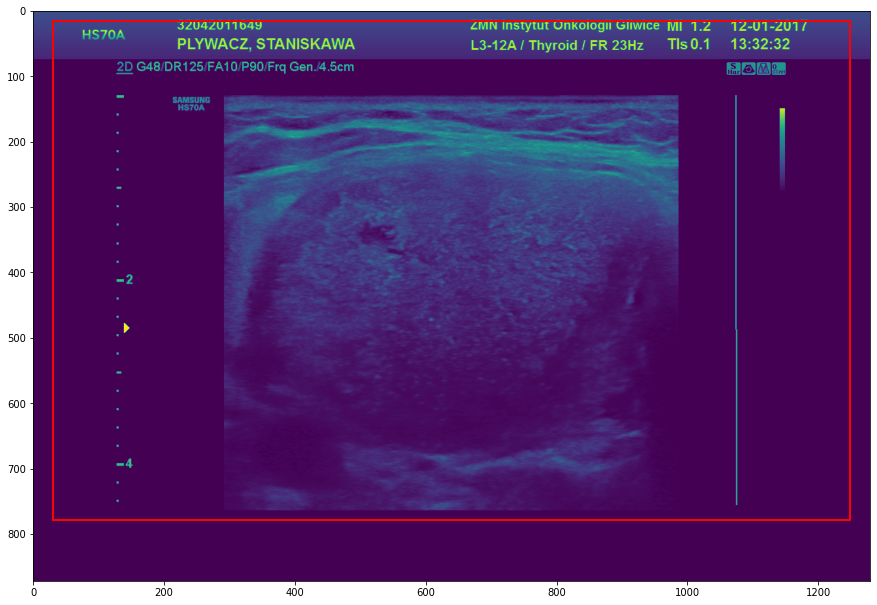

In [26]:
def detect_image_frame(image, margin_x=140, margin_y=80):
    
    X_MARGIN = 15
    Y_MARGIN = 30
    
    image = image[X_MARGIN:-50, Y_MARGIN:-Y_MARGIN]

    # Apply edge detection to the grayscale image
    edges = cv2.Canny(image, 50, 100)

    # Use the HoughLinesP function to detect lines in the image
    lines = cv2.HoughLinesP(edges, 2, np.pi/180, 50, minLineLength=5, maxLineGap=10)
    vertical_lines = []

    xs = []
    ys = []

    # Iterate over the detected lines
    for line in lines:
        x1, y1, x2, y2 = line[0]

        # Filter out lines that are not vertical
        if x1 != x2 and y1 != y2:
            continue

        xs.append(x1)
        xs.append(x2)

        ys.append(y1)
        ys.append(y2)

        # Filter out lines that are not long enough
        if abs(y1 - y2) < 200:
            continue

    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    # return min_x + margin_x, max_x - margin_x, min_y + margin_y, max_y - margin_y
    return min_x+Y_MARGIN, max_x+Y_MARGIN, min_y+X_MARGIN, max_y+Y_MARGIN

# Read the image
image, header = nrrd.read(images_paths[0])

fig = plt.figure(figsize=(15, 15))
ax = plt.subplot()
ax.imshow(image)

min_x, max_x, min_y, max_y = detect_image_frame(image)

ax.plot([min_x, min_x], [min_y, max_y], color='red', linewidth=2)
ax.plot([max_x, max_x], [min_y, max_y], color='red', linewidth=2)

ax.plot([min_x, max_x], [min_y, min_y], color='red', linewidth=2)
ax.plot([min_x, max_x], [max_y, max_y], color='red', linewidth=2)

plt.show()

In [18]:
header

OrderedDict([('type', 'uint8'),
             ('dimension', 2),
             ('sizes', array([360, 560])),
             ('encoding', 'gzip')])

In [19]:
image.shape

(360, 560)

In [20]:
cropped_image = image[min_y:max_y, min_x:max_x]

In [21]:
cropped_image.shape

(304, 487)

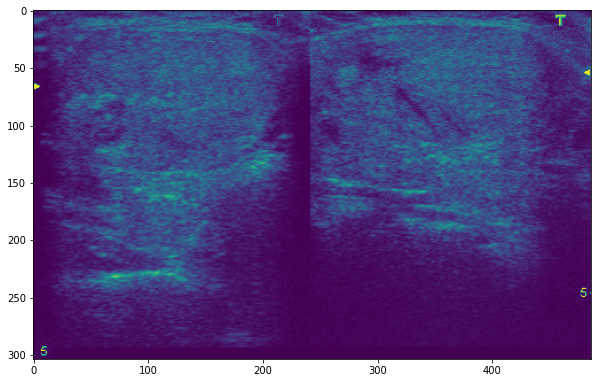

In [22]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
ax.imshow(cropped_image)
plt.show()

### Process Images

In [23]:
len(images_paths)

480

In [24]:
def extract_raw_images(images_paths, contoures_paths, save=True, resize='padding'):
    points = []
    full_images = []
    images = []
    masks = []
    failed = []
    
    for i in range(len(images_paths)):

        image, header = nrrd.read(images_paths[i])
        contour, header = nrrd.read(contoures_paths[i])

        try:
            min_x, max_x, min_y, max_y = detect_image_frame(image)
        except:
            failed.append(i)
            continue

        num = (max_x-min_x)
        den = (max_y-min_y)

        if den == 0:
            failed.append(i)
            continue

        ratio = num / den 

        if ratio > 3 or ratio < 0.33:
            failed.append(i)
            continue

        try:
            cropped_image = image[min_y:max_y, min_x:max_x]
            cropped_contour = contour[min_y:max_y, min_x:max_x]

            cropped_image = cropped_image[..., np.newaxis]
            cut_image = tf.image.resize(cropped_image, (512, 512))
            padded_image = tf.image.resize_with_pad(cropped_image, 512, 512)

            cropped_contour = cropped_contour[..., np.newaxis]
            cut_contour = tf.image.resize(cropped_contour, (512, 512))
            padded_contour = tf.image.resize_with_pad(cropped_contour, 512, 512)

            images.append(cropped_image)
            masks.append(cropped_contour)
            full_images.append(image)
            points.append([min_x, max_x, min_y, max_y])
        except:
            continue
            
    
    images = np.array(images)
    masks = np.array(masks)
    full_images = np.array(full_images)
    points = np.array(points)
    
    return images, masks, full_images, points
        

In [25]:
images, masks, full_images, points = extract_raw_images(images_paths,contoures_paths)

/home/sciemala/thyroid_analysis/.env/lib64/python3.6/site-packages/ipykernel_launcher.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/sciemala/thyroid_analysis/.env/lib64/python3.6/site-packages/ipykernel_launcher.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [26]:
print(images.shape)
print(masks.shape)
print(full_images.shape)
print(points.shape)

(480,)
(480,)
(480, 360, 560)
(480, 4)


In [45]:
images, masks = [], []

# Set the directory path
raw_dir = "dataUSGthyroid/samsung_processed"
raw_images = raw_dir + "/images"
raw_masks = raw_dir + "/masks"

i = 0
for image_path, mask_path in zip(images_paths, contoures_paths):
    image, header = nrrd.read(image_path)
    mask, header = nrrd.read(mask_path)
    
    image = np.expand_dims(np.array(image[130:-110, 290:-294]), 2)
    mask = np.expand_dims(np.array(mask[130:-110, 290:-294]), 2)
    
    nrrd.write(f'{raw_images}/{i}.nrrd', image)
    nrrd.write(f'{raw_masks}/{i}.nrrd', mask)
    i+=1

In [34]:
image.shape

(632, 696)

In [42]:
image = images[0][130:-110, 290:-294]
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
ax.imshow(image)
plt.show()

IndexError: list index out of range

In [4]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from math import ceil

COLS, ROWS = 4, 9
N_SUB = COLS * ROWS
N_TABS = ceil(len(images) / N_SUB)

In [28]:
%matplotlib inline

# N_TABS = 2

outs = [widgets.Output() for i in range(N_TABS)]
tab = widgets.Tab(children = outs)
for i in range(len(outs)): tab.set_title(i, str(i))
display(tab)

nth_image = 0
for n_tab, out in enumerate(outs):
    with out:
        fig, axs = plt.subplots(ROWS, COLS, figsize=(25, 25))
        sub_images = full_images[n_tab*N_SUB:(n_tab+1)*N_SUB]
        sub_points = points[n_tab*N_SUB:(n_tab+1)*N_SUB]
        for i, ax in enumerate(axs.flat):
            ax.imshow(sub_images[i])
            min_x, max_x, min_y, max_y = sub_points[i]

            ax.plot([min_x, min_x], [min_y, max_y], color='red', linewidth=2)
            ax.plot([max_x, max_x], [min_y, max_y], color='red', linewidth=2)

            ax.plot([min_x, max_x], [min_y, min_y], color='red', linewidth=2)
            ax.plot([min_x, max_x], [max_y, max_y], color='red', linewidth=2)
            
            # ax.title(str(nth_image))
            
            if i == len(sub_images)-1 and n_tab == N_TABS-1: break
        plt.show()

In [5]:
%matplotlib inline

outs = [widgets.Output() for i in range(N_TABS)]
tab = widgets.Tab(children = outs)
for i in range(len(outs)): tab.set_title(i, str(i))
display(tab)

for n_tab, out in enumerate(outs):
    with out:
        fig, axs = plt.subplots(ROWS, COLS, figsize=(25, 25))
        sub_images = images[n_tab*N_SUB:(n_tab+1)*N_SUB]
        sub_masks = masks[n_tab*N_SUB:(n_tab+1)*N_SUB]
        for i, ax in enumerate(axs.flat):
            ax.imshow(sub_images[i])
            ax.imshow(sub_masks[i], alpha=0.5)
            
            if i == len(sub_images)-1 and n_tab == N_TABS-1: break
        plt.show()

## Save

In [10]:
# Set the directory path
raw_dir = "RawUSGimagesNRRD"
raw_images = raw_dir + "/data_output"
raw_masks = raw_dir + "/masks"

In [98]:
if not os.path.exists(raw_dir):
    os.makedirs(raw_dir)

if not os.path.exists(raw_images):
    os.makedirs(raw_images)

if not os.path.exists(raw_masks):
    os.makedirs(raw_masks)

In [2]:
raw_masks

'RawUSGimagesNRRD/masks'

In [101]:
for i in range(len(images)):    
    nrrd.write(f'{raw_images}/{i}.nrrd', images[i])
    nrrd.write(f'{raw_masks}/{i}.nrrd', masks[i])

## 2. Create Tensorflow Dataset

In [2]:
from tensorflow.keras.utils import Sequence

In [11]:
raw_images_paths = sorted(glob.glob(raw_images + '**/*', recursive=True))
raw_masks_paths = sorted(glob.glob(raw_masks + '**/*', recursive=True))

In [19]:
raw_images = []
raw_masks = []

In [20]:
for i in range(len(raw_images_paths)):
    raw_image, header = nrrd.read(raw_images_paths[i])
    raw_mask, header = nrrd.read(raw_masks_paths[i])
    
    raw_images.append(raw_image)
    raw_masks.append(raw_mask)

In [14]:
from tensorflow.image import random_crop

In [51]:
def visualize(org_imge, org_mask, aug_image, aug_mask):
    fig = plt.figure(figsize=(12, 12))
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(org_imge)
    plt.imshow(org_mask, alpha=0.5)

    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(aug_image)
    plt.imshow(aug_mask, alpha=0.5)

In [41]:
IMG_WIDTH = 512
IMG_HEIGHT = 512

In [45]:
image = tf.image.resize_with_pad(raw_images[0], IMG_WIDTH, IMG_HEIGHT)
mask = tf.image.resize_with_pad(raw_masks[0], IMG_WIDTH, IMG_HEIGHT)

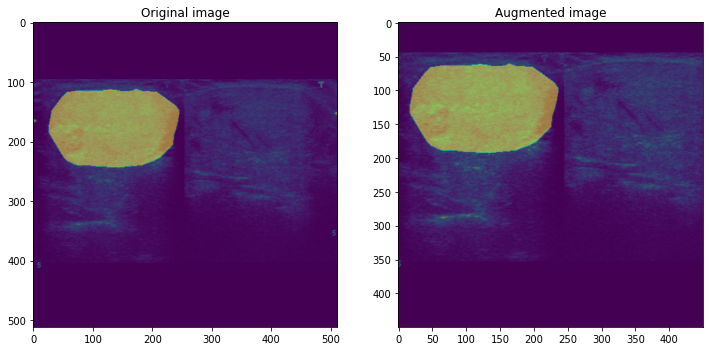

In [68]:
stacked_image = tf.stack([image, mask], axis=0)
cropped_image = tf.image.random_crop(stacked_image, size=[2, 450, 450, 1])
cropped_image, cropped_mask = cropped_image
visualize(image, mask, cropped_image, cropped_mask)

In [26]:
class UltraSoundImages(Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, raw_images_paths, raw_masks_paths, size=None):
        self.batch_size = batch_size
        self.images = []
        self.masks = []
        
        for i in range(len(raw_images_paths)):
            image, header = nrrd.read(raw_images_paths[i])
            mask, header = nrrd.read(raw_masks_paths[i])
            
            if size:
                image = tf.image.resize_with_pad(image, size[0], size[1])
                mask = tf.image.resize_with_pad(mask, size[0], size[1])
            
            self.images.append(tf.convert_to_tensor(list(image)))
            self.images.append(tf.convert_to_tensor(list(mask)))

    def __len__(self):
        return len(self.masks) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        output_images = self.images[i : i + self.batch_size]
        output_masks = self.masks[i : i + self.batch_size]
        
        return np.array(output_images), np.array(output_masks)

In [27]:
train_gen = UltraSoundImages(4, raw_images_paths, raw_masks_paths, size=(512,512))

In [28]:
train_gen.__getitem__(0)[0].shape

(4, 512, 512, 1)

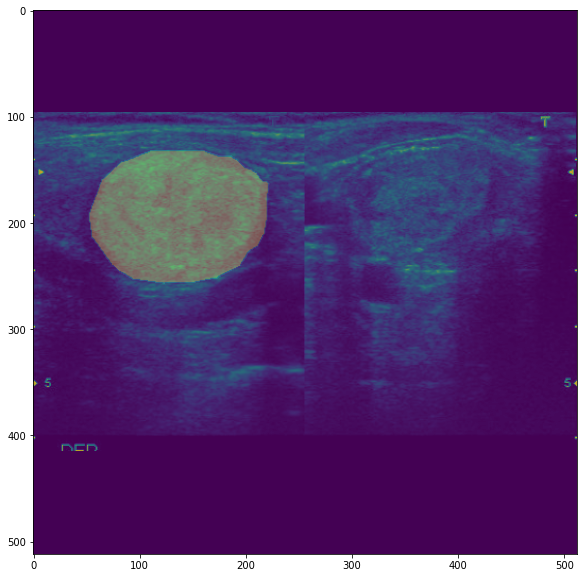

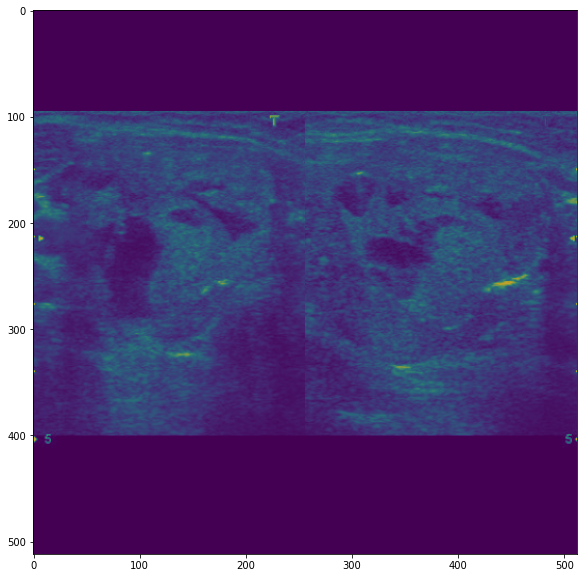

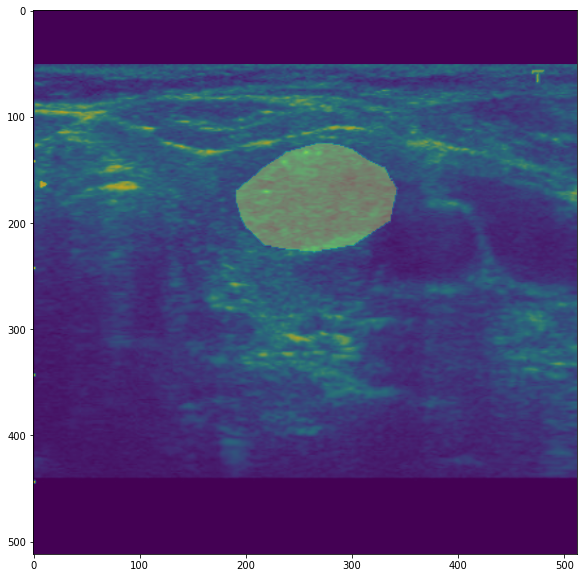

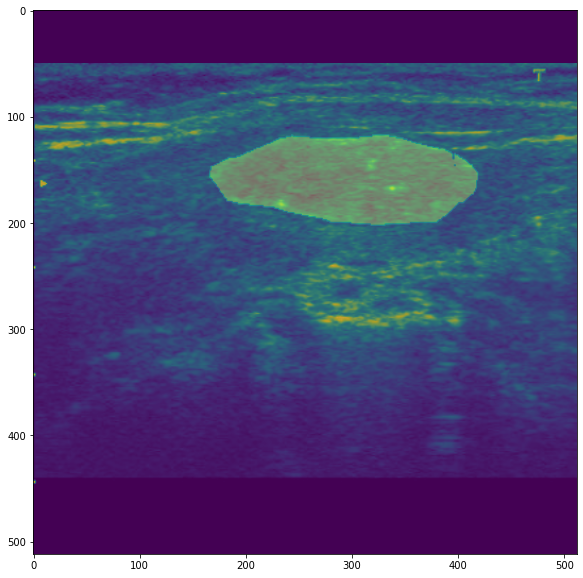

In [13]:
images, masks = train_gen.__getitem__(1)

# Iterate over the dataset and print the element
for image, mask in zip(images, masks):
    fig = plt.figure(figsize=(10, 10))

    # Create a single subplot
    ax = plt.subplot()

    ax.imshow(image)
    ax.imshow(mask, alpha=0.3)
    
fig, axs = plt.subplots(ROWS, COLS, figsize=(25, 25))
        sub_images = images[n_tab*N_SUB:(n_tab+1)*N_SUB]
        sub_masks = masks[n_tab*N_SUB:(n_tab+1)*N_SUB]
        for i, ax in enumerate(axs.flat):
            ax.imshow(sub_images[i])
            ax.imshow(sub_masks[i], alpha=0.5)

# Show the figure
plt.show()

In [34]:
dataset = tf.data.Dataset.from_tensor_slices((raw_images, raw_masks))

In [35]:
dataset.element_spec

(TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None))

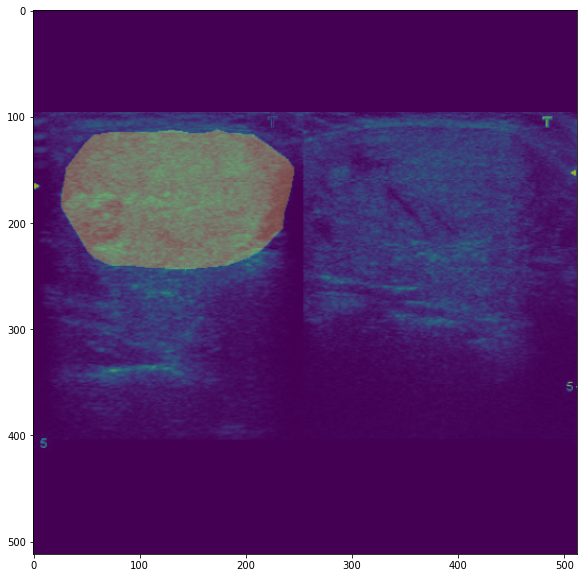

In [46]:
# Create a dataset with the first 10 elements
num_elements = 10
taken_dataset = dataset.take(num_elements)

# Iterate over the dataset and print the elements
for image, mask in taken_dataset.take(1):
    fig = plt.figure(figsize=(10, 10))

    # Create a single subplot
    ax = plt.subplot()

    ax.imshow(image)
    ax.imshow(mask, alpha=0.3)

# Show the figure
plt.show()

In [57]:
X_train, y_train = [], []
for image, mask in dataset.take(16):
    X_train.append(image)
    y_train.append(mask)

In [59]:
np.array(y_train).shape

(16, 512, 512, 1)

### Create a model

In [19]:
from models import unet_model

In [20]:
unet = unet_model((None,None,1), 1)
unet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 64)    640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 64)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, None, None, 128)   0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 256)   295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, None, None, 256)   0     

### Compile model

In [21]:
unet.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Create Callbacks

In [22]:
# Create the EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

### Train

In [23]:
# Train the model with the EarlyStopping callback
history = unet.fit(train_gen, epochs=10, batch_size=16, callbacks=[early_stopping])

/home/sciemala/thyroid_analysis/.env/lib64/python3.6/site-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

### History

In [ ]:
def plot_history(history):
    # Extract the history values
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']

    # Plot the loss values
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'])
    plt.show()

    # Plot the accuracy values
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Training', 'Validation'])
    plt.show()

In [ ]:
plot_history(history)